In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
data_orj=pd.read_csv("BlackFriday.csv")
data_orj.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
data = data_orj.loc [1:10000,'Gender':'Purchase'] 
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,M,26-35,15,A,3,0,1,2.0,NaN,15227


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 10 columns):
Gender                        10000 non-null object
Age                           10000 non-null object
Occupation                    10000 non-null int64
City_Category                 10000 non-null object
Stay_In_Current_City_Years    10000 non-null object
Marital_Status                10000 non-null int64
Product_Category_1            10000 non-null int64
Product_Category_2            6757 non-null float64
Product_Category_3            2997 non-null float64
Purchase                      10000 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 781.3+ KB


In [10]:
data.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,8.433100,0.405400,5.293000,9.796359,12.811144,9152.354200
std,6.660462,0.490994,3.660668,5.055550,4.057049,4881.582657
min,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8021.000000
75%,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


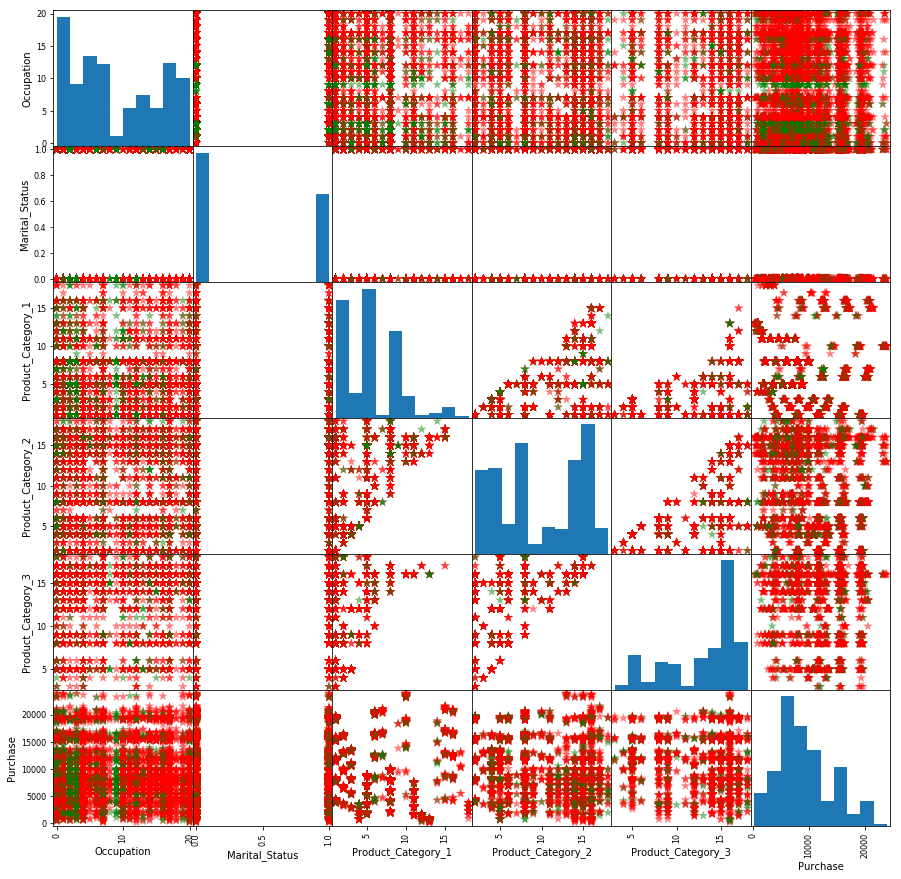

In [11]:
color_list = ['red' if i=='M' else 'green' for i in data.loc[:,'Gender']]
pd.plotting.scatter_matrix(data.loc[:,data.columns != 'Gender'],
                          c = color_list,
                          figsize = [15,15],
                          diagonal = 'hist',
                          alpha = 0.5, 
                          s = 100,
                          marker = '*')
plt.show()



M    7637
F    2363
Name: Gender, dtype: int64

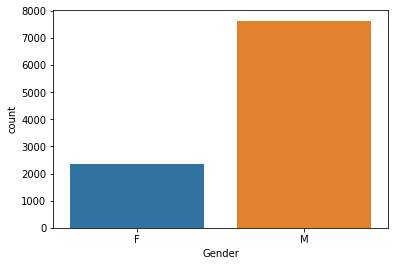

In [12]:
sns.countplot(x='Gender', data=data)
data.loc[:,'Gender'].value_counts()

In [13]:
data_knn = data_orj[['Occupation','Gender', 'Purchase']]

In [14]:
data_knn.head()

,Occupation,Gender,Purchase
0,10,F,8370
1,10,F,15200
2,10,F,1422
3,10,F,1057
4,16,M,7969


In [15]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 3 columns):
Occupation    537577 non-null int64
Gender        537577 non-null object
Purchase      537577 non-null int64
dtypes: int64(2), object(1)
memory usage: 12.3+ MB


In [16]:
#KNN-2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data_knn.loc[:,data_knn.columns != 'Gender'], data_knn.loc[:,'Gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.7010367449185858


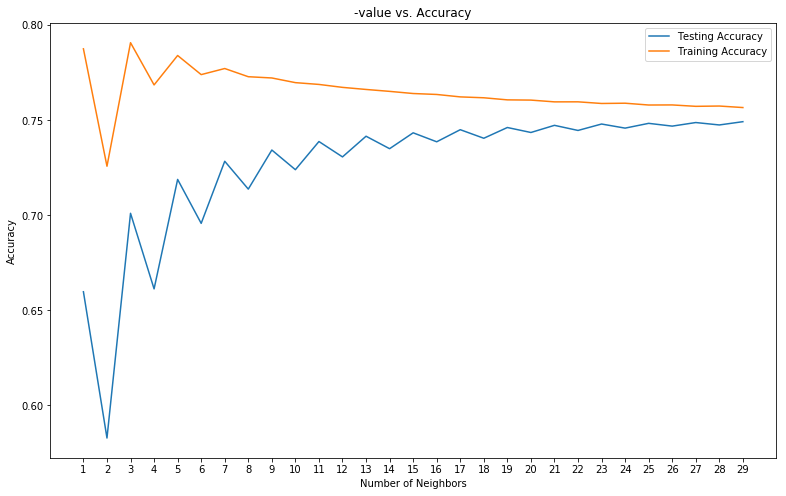

Best Accuracy is 0.7492342225033173 with K = 29


In [17]:
#Best K value selection
neig = np.arange(1,30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

# Plot
plt.figure(figsize=(13,8))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))